# Feature Selection

In [1]:
!pip install imblearn

     |████████████████████████████████| 167 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 9.9 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, SelectPercentile

from imblearn.over_sampling import RandomOverSampler, SMOTE

## Import Dataset

In [3]:
accidents = pd.read_csv('data/accidents.csv', index_col=0)
accidents.head(2)

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,was_dark_no_lighting,is_day,is_evening,is_morning,is_night,season,is_fall,is_spring,is_summer,is_winter
0,JC343143,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,NaN,...,0,1,0,0,0,summer,0,0,1,0
1,JC194776,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,4.0,...,0,0,0,0,1,spring,0,1,0,0


In [4]:
for feature in sorted(accidents.columns):
    print(feature)

ALIGNMENT
BEAT_OF_OCCURRENCE
CRASH_DATE
CRASH_DAY_OF_WEEK
CRASH_HOUR
CRASH_TYPE
DEVICE_CONDITION
FIRST_CRASH_TYPE
HIT_AND_RUN_I
INJURIES_UNKNOWN
INTERSECTION_RELATED_I
LANE_CNT
LATITUDE
LIGHTING_CONDITION
LOCATION
LONGITUDE
NOT_RIGHT_OF_WAY_I
POSTED_SPEED_LIMIT
PRIM_CONTRIBUTORY_CAUSE
RD_NO
ROADWAY_SURFACE_COND
ROAD_DEFECT
SEC_CONTRIBUTORY_CAUSE
STREET_DIRECTION
STREET_NAME
STREET_NO
TRAFFICWAY_TYPE
TRAFFIC_CONTROL_DEVICE
WEATHER_CONDITION
WORKERS_PRESENT_I
WORK_ZONE_I
WORK_ZONE_TYPE
at_intersection
at_stop_sign_or_traffic_light
crash_date
crash_month
crash_year
has_snow_ice
involved_pedest_cycle
is_clear_weather
is_day
is_evening
is_fall
is_fatal_or_incap
is_morning
is_night
is_rain
is_sleet_snow
is_spring
is_summer
is_weekend
is_winter
season
time_of_day
was_dark_no_lighting


## Split Data and Determine Features to Assess
Selecting features solely based on training data.

In [5]:
X = accidents[['crash_month',
              'CRASH_HOUR',
              'is_weekend',
              'has_snow_ice',
              'involved_pedest_cycle',
              'at_intersection',
              'at_stop_sign_or_traffic_light',
              'is_day',
              'is_evening',
              'is_morning',
              'is_night',
               'is_rain',
               'is_sleet_snow',
               'is_spring',
               'is_summer',
               'is_weekend',
               'is_winter']]

y = accidents['is_fatal_or_incap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [7]:
X_train

,crash_month,CRASH_HOUR,is_weekend,has_snow_ice,involved_pedest_cycle,at_intersection,at_stop_sign_or_traffic_light,is_day,is_evening,is_morning,is_night,is_rain,is_sleet_snow,is_spring,is_summer,is_weekend,is_winter
23106,7,16,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
74711,12,12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
56033,5,21,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
232719,9,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
86242,12,17,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11261,1,16,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1
48056,1,14,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
77049,12,15,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
198296,12,20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [12]:
# OVERSAMPLING

# random_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=3)
# X_over, y_over = random_sampler.fit_resample(X_train, y_train)

smote = SMOTE(sampling_strategy=0.5, random_state=3)
X_over, y_over = smote.fit_resample(X_train.to_numpy(), y_train.to_numpy())

## Mutual Information

In [13]:
mutual_info_scores = mutual_info_classif(X_over, y_over)
mutual_info_scores

array([0.00633551, 0.00882278, 0.0046204 , 0.00519681, 0.05428625,
       0.00181789, 0.00878097, 0.01201291, 0.00206177, 0.00263913,
       0.00367384, 0.00208293, 0.00363059, 0.00219519, 0.00215074,
       0.00304164, 0.00476701])

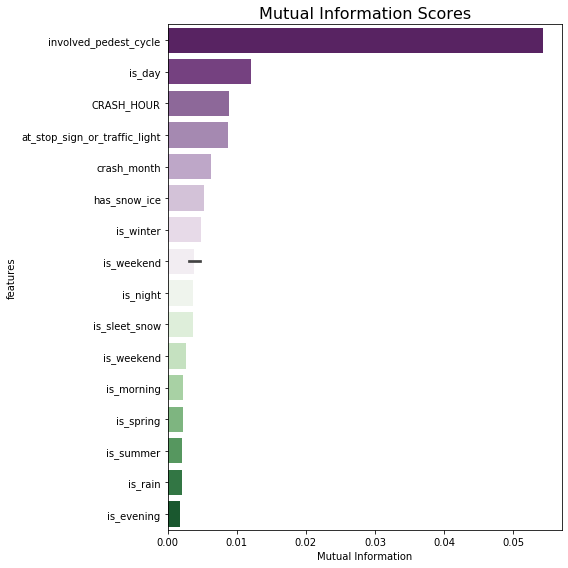

In [14]:
mi_df = pd.DataFrame()
mi_df['features'] = X.columns
mi_df['mutual_info_score'] = mutual_info_scores
mi_df.sort_values('mutual_info_score', ascending=False, axis=0, inplace=True)


fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=mi_df,x='mutual_info_score', y='features', palette='PRGn', ax=ax)
ax.set_title('Mutual Information Scores', fontsize=16)
ax.set_xlabel('Mutual Information')
ax.set_yticklabels(mi_df['features'])
fig.tight_layout();


## Chi-Squared

Can only use categorical features.